In [3]:
import sys,os
import multiprocessing
from joblib import Parallel, delayed
import time

import numpy as np
import sympy as sp

import matplotlib.pyplot as plt
plt.rcParams.update({
    'text.latex.preamble': r'\usepackage{amsmath}',
    'text.usetex': True,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica']
})
from matplotlib import cm,colors

#### delta source

math

In [4]:
x      = sp.symbols(r'x',real=True)
m,k,V0 = sp.symbols(r'm k V_0',real=True,positive=True)
A,B    = sp.symbols(r'A B')

psi_l = sp.exp(sp.I*k*x) + A*sp.exp(-sp.I*k*x)
psi_r = B*sp.exp(sp.I*k*x)

BC1 = sp.Eq(psi_l.subs(x,0),psi_r.subs(x,0))
BC2 = sp.Eq(psi_r.diff(x).subs(x,0) - psi_l.diff(x).subs(x,0),2*m*V0*psi_r.subs(x,0))

sol = sp.solve([BC1,BC2],[A,B],dict=True)[0]
A_  = sol[A]
B_  = sol[B]

display(sp.Eq(A,A_))
display(sp.Eq(B,B_))

A_abs = sp.Abs(A_)
B_abs = sp.Abs(B_)
tan_chi_A = -sp.im(A_)/sp.re(A_)
tan_chi_B = -sp.im(B_)/sp.re(B_)

display(sp.Eq(sp.Abs(A),A_abs))
display(sp.Eq(sp.tan(sp.Symbol(r'\chi_A')),tan_chi_A))
display(sp.Eq(sp.Abs(B),B_abs))
display(sp.Eq(sp.tan(sp.Symbol(r'\chi_B')),tan_chi_B))

display(sp.Eq(sp.Symbol(r"\chi_{A}'(k)"),tan_chi_A.diff(k)/(1 + sp.atan(tan_chi_A)**2)))
display(sp.Eq(sp.Symbol(r"\chi_{B}'(k)"),tan_chi_B.diff(k)/(1 + sp.atan(tan_chi_B)**2)))

Eq(A, -I*V_0*m/(I*V_0*m + k))

Eq(B, k/(I*V_0*m + k))

Eq(Abs(A), V_0*m/sqrt(V_0**2*m**2 + k**2))

Eq(tan(\chi_A), -k/(V_0*m))

Eq(Abs(B), k/sqrt(V_0**2*m**2 + k**2))

Eq(tan(\chi_B), V_0*m/k)

Eq(\chi_{A}'(k), -1/(V_0*m*(atan(k/(V_0*m))**2 + 1)))

Eq(\chi_{B}'(k), -V_0*m/(k**2*(atan(V_0*m/k)**2 + 1)))

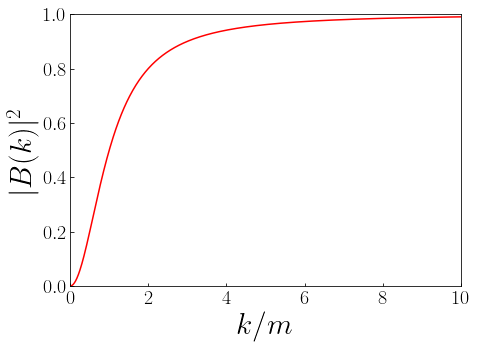

In [5]:
nrows,ncols = 1,1
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

V0 = 1
k  = np.linspace(0,10,1000)
B  = k/(k + complex(0,1)*V0)

ax.plot(k,np.abs(B)**2,'r')
# ax.axhline(1,color='k',ls='-.')

ax.set_xlabel(r'$k/m$',size=30)
ax.set_ylabel(r'$|B(k)|^2$',size=30)
ax.tick_params(axis='both',which='major',labelsize=20,direction='in')
ax.set_xlim(0,10)
ax.set_ylim(0,1)

plt.show()

#### square barrier

math

In [8]:
# E < V0
x       = sp.symbols(r'x',real=True)
a,m,V0  = sp.symbols(r'a m V_0',real=True,positive=True)
k,kappa = sp.symbols(r'k \kappa',real=True,positive=True)
A,B,C,D = sp.symbols(r'A B C D')

psi_l = sp.exp(sp.I*k*x) + A*sp.exp(-sp.I*k*x)
psi_m = C*sp.cosh(kappa*x) + D*sp.sinh(kappa*x)
psi_r = B*sp.exp(sp.I*k*x)

BC1 = sp.Eq(psi_l.subs(x,0),psi_m.subs(x,0))
BC2 = sp.Eq(psi_l.diff(x).subs(x,0),psi_m.diff(x).subs(x,0))
BC3 = sp.Eq(psi_m.subs(x,a),psi_r.subs(x,a))
BC4 = sp.Eq(psi_m.diff(x).subs(x,a),psi_r.diff(x).subs(x,a))

sol = sp.solve([BC1,BC2,BC3,BC4],[A,B,C,D],dict=True)[0]
A_  = sol[A].simplify()
B_  = sol[B].simplify()

display(sp.Eq(A,A_))
display(sp.Eq(B,B_))

A_abs = sp.Abs(A_).simplify()
B_abs = sp.Abs(B_).simplify()
tan_chi_A = -sp.im(A_)/sp.re(A_)
tan_chi_B = -sp.im(B_)/sp.re(B_)

display(sp.Eq(sp.Abs(A),A_abs))
# display(sp.Eq(sp.tan(sp.Symbol(r'\chi_A')),tan_chi_A))
display(sp.Eq(sp.Abs(B),B_abs))
# display(sp.Eq(sp.tan(sp.Symbol(r'\chi_B')),tan_chi_B))

# display(sp.Eq(sp.Symbol(r"\chi_{A}'(k)"),tan_chi_A.diff(k)/(1 + sp.atan(tan_chi_A)**2)))
# display(sp.Eq(sp.Symbol(r"\chi_{B}'(k)"),tan_chi_B.diff(k)/(1 + sp.atan(tan_chi_B)**2)))

Eq(A, -I*(\kappa**2 + k**2)*sinh(\kappa*a)/(2*\kappa*k*cosh(\kappa*a) + I*(\kappa**2 - k**2)*sinh(\kappa*a)))

Eq(B, 2*\kappa*k*exp(-I*a*k)/(2*\kappa*k*cosh(\kappa*a) + I*(\kappa**2 - k**2)*sinh(\kappa*a)))

Eq(Abs(A), (\kappa**2 + k**2)*sinh(\kappa*a)/sqrt(\kappa**4*sinh(\kappa*a)**2 + 2*\kappa**2*k**2*sinh(\kappa*a)**2 + 4*\kappa**2*k**2 + k**4*sinh(\kappa*a)**2))

Eq(Abs(B), 2*\kappa*k/sqrt(\kappa**4*sinh(\kappa*a)**2 + 2*\kappa**2*k**2*sinh(\kappa*a)**2 + 4*\kappa**2*k**2 + k**4*sinh(\kappa*a)**2))

In [9]:
# E > V0
x       = sp.symbols(r'x',real=True)
a,m,V0  = sp.symbols(r'a m V_0',real=True,positive=True)
k,kp    = sp.symbols(r"k k'",real=True,positive=True)
A,B,C,D = sp.symbols(r'A B C D')

psi_l = sp.exp(sp.I*k*x) + A*sp.exp(-sp.I*k*x)
psi_m = C*sp.cos(kp*x) + D*sp.sin(kp*x)
psi_r = B*sp.exp(sp.I*k*x)

BC1 = sp.Eq(psi_l.subs(x,0),psi_m.subs(x,0))
BC2 = sp.Eq(psi_l.diff(x).subs(x,0),psi_m.diff(x).subs(x,0))
BC3 = sp.Eq(psi_m.subs(x,a),psi_r.subs(x,a))
BC4 = sp.Eq(psi_m.diff(x).subs(x,a),psi_r.diff(x).subs(x,a))

sol = sp.solve([BC1,BC2,BC3,BC4],[A,B,C,D],dict=True)[0]
A_  = sol[A].simplify()
B_  = sol[B].simplify()

display(sp.Eq(A,A_))
display(sp.Eq(B,B_))

A_abs = sp.Abs(A_).simplify()
B_abs = sp.Abs(B_).simplify()
tan_chi_A = -sp.im(A_)/sp.re(A_)
tan_chi_B = -sp.im(B_)/sp.re(B_)

display(sp.Eq(sp.Abs(A),A_abs))
# display(sp.Eq(sp.tan(sp.Symbol(r'\chi_A')),tan_chi_A))
display(sp.Eq(sp.Abs(B),B_abs))
# display(sp.Eq(sp.tan(sp.Symbol(r'\chi_B')),tan_chi_B))

# display(sp.Eq(sp.Symbol(r"\chi_{A}'(k)"),tan_chi_A.diff(k)/(1 + sp.atan(tan_chi_A)**2)))
# display(sp.Eq(sp.Symbol(r"\chi_{B}'(k)"),tan_chi_B.diff(k)/(1 + sp.atan(tan_chi_B)**2)))

Eq(A, (k**2 - k'**2)*sin(a*k')/(k**2*sin(a*k') + 2*I*k*k'*cos(a*k') + k'**2*sin(a*k')))

Eq(B, 2*I*k*k'*exp(-I*a*k)/(k**2*sin(a*k') + 2*I*k*k'*cos(a*k') + k'**2*sin(a*k')))

Eq(Abs(A), Abs((k**2 - k'**2)*sin(a*k'))/sqrt(k**4*sin(a*k')**2 - 2*k**2*k'**2*sin(a*k')**2 + 4*k**2*k'**2 + k'**4*sin(a*k')**2))

Eq(Abs(B), 2*k*k'/sqrt(k**4*sin(a*k')**2 - 2*k**2*k'**2*sin(a*k')**2 + 4*k**2*k'**2 + k'**4*sin(a*k')**2))

In [10]:
# E = V0
x       = sp.symbols(r'x',real=True)
a,m,V0  = sp.symbols(r'a m V_0',real=True,positive=True)
k,kp    = sp.symbols(r"k k'",real=True,positive=True)
A,B,C,D = sp.symbols(r'A B C D')

psi_l = sp.exp(sp.I*k*x) + A*sp.exp(-sp.I*k*x)
psi_m = C + D*x
psi_r = B*sp.exp(sp.I*k*x)

BC1 = sp.Eq(psi_l.subs(x,0),psi_m.subs(x,0))
BC2 = sp.Eq(psi_l.diff(x).subs(x,0),psi_m.diff(x).subs(x,0))
BC3 = sp.Eq(psi_m.subs(x,a),psi_r.subs(x,a))
BC4 = sp.Eq(psi_m.diff(x).subs(x,a),psi_r.diff(x).subs(x,a))

sol = sp.solve([BC1,BC2,BC3,BC4],[A,B,C,D],dict=True)[0]
A_  = sol[A].simplify()
B_  = sol[B].simplify()

display(sp.Eq(A,A_))
display(sp.Eq(B,B_))

A_abs = sp.Abs(A_).simplify()
B_abs = sp.Abs(B_).simplify()
tan_chi_A = -sp.im(A_)/sp.re(A_)
tan_chi_B = -sp.im(B_)/sp.re(B_)

display(sp.Eq(sp.Abs(A),A_abs))
# display(sp.Eq(sp.tan(sp.Symbol(r'\chi_A')),tan_chi_A))
display(sp.Eq(sp.Abs(B),B_abs))
# display(sp.Eq(sp.tan(sp.Symbol(r'\chi_B')),tan_chi_B))

# display(sp.Eq(sp.Symbol(r"\chi_{A}'(k)"),tan_chi_A.diff(k)/(1 + sp.atan(tan_chi_A)**2)))
# display(sp.Eq(sp.Symbol(r"\chi_{B}'(k)"),tan_chi_B.diff(k)/(1 + sp.atan(tan_chi_B)**2)))

Eq(A, a*k/(a*k + 2*I))

Eq(B, 2*I*exp(-I*a*k)/(a*k + 2*I))

Eq(Abs(A), a*k/sqrt(a**2*k**2 + 4))

Eq(Abs(B), 2/sqrt(a**2*k**2 + 4))

In [63]:
def A2(k,m=1,V0=1,a=1):
    if k**2 < 2*V0:
        kappa = np.sqrt(2*m*V0-k**2)
        return 4*m**2*V0**2*np.sinh(kappa*a)**2/(4*kappa**2*k**2 + 4*m**2*V0**2*np.sinh(kappa*a)**2)
    elif k**2 == 2*V0:
        return k**2*a**2/(4 + a**2*k**2)
    else:
        kp = np.sqrt(k**2 - 2*m*V0)
        return 4*m**2*V0**2*np.sin(kp*a)**2/(4*kp**2*k**2 + 4*m**2*V0**2*np.sin(kp*a)**2)

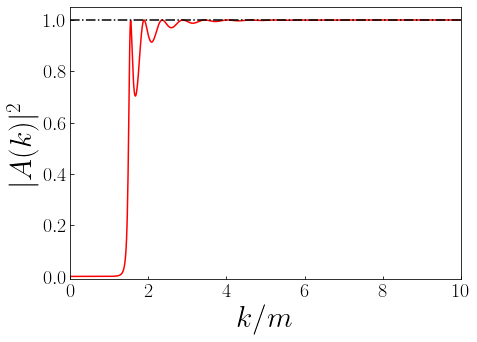

In [64]:
nrows,ncols = 1,1
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

k   = np.linspace(0,10,1000)
A2_ = np.array([A2(_,V0=1,a=5) for _ in k])

ax.plot(k,1-A2_,'r')
ax.axhline(1,color='k',ls='-.')

ax.set_xlabel(r'$k/m$',size=30)
ax.set_ylabel(r'$|A(k)|^2$',size=30)
ax.tick_params(axis='both',which='major',labelsize=20,direction='in')
ax.set_xlim(0,10)
ax.set_ylim(-0.01,None)

plt.show()

numerics

In [46]:
def V(x,a=1,V0=1):
    return V0*(x > 0)*(x < a)

In [47]:
def get_RT(k,m=1,sig_x=10,x0=-30,xm=100,N=5000,V0=1,a=1,dt=0.001,max_iter=int(1e5),tol=1e-3):
    x  = np.linspace(-xm,xm,N)
    dx = x[1] - x[0]
    li = x < 0
    ri = x > a
    
    psi0 = Psi0_gwp(x,m=m,sig=sig_x,k=k,x0=x0)
    for i in range(max_iter):
        psi  = U_psi_ft(dt,x,psi0,m=m,V=lambda t: V(t,a=a,V0=V0))
        drho = dx*np.abs(psi)**2
        
        R = np.sum(drho[li])
        T = np.sum(drho[ri])
        
        if 1 - (R + T) < tol and (k*i*dt/m + x0) > 0:
            # print(i)
            break
        else:
            psi0 = psi.copy()
    
    # t = i*dt
    # print(t**2/(8*sig_x**4*m**2))
            
    return np.array([R,T])

In [50]:
m    = 10
V0,a = 2,3
k    = np.linspace(1,10,10)

results = Parallel(n_jobs=7)(delayed(get_RT)(_,m=m,N=10000,dt=0.01,V0=V0,a=a) for _ in k)
R,T = np.array(results).T

# R,T  = np.array([get_RT(_,V0=V0,a=a) for _ in k]).T
# print(T)

/var/folders/_b/29vq0z955j77svdys97cr5p40000gn/T/ipykernel_79632/4230753817.py:8: RuntimeWarning: invalid value encountered in sqrt
  kp = np.sqrt(k**2 - 2*m*V0)


ValueError: x and y must have same first dimension, but have shapes (1000,) and (10,)

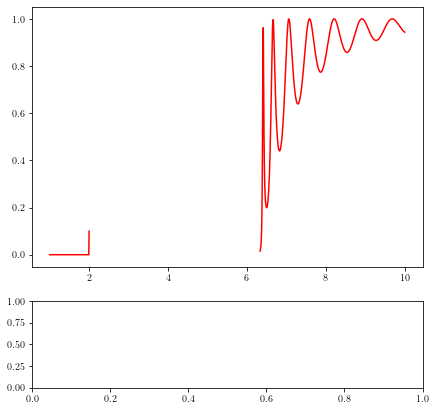

In [60]:
nrows,ncols = 2,1
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7,7),gridspec_kw={'height_ratios':[6,2]})

ke  = np.linspace(1,10,1000)
Te_ = np.array([1 - A2(_,m=m,V0=V0,a=a) for _ in ke])
ax[0].plot(ke,Te_,'r-',label=r'${\rm exact}$')
ax[0].plot(k,T,color='k',ls='None',marker='.',markersize=10,label=r'$\rm numeric$')

ax[0].set_ylabel(r'$|B(k)|^2$',size=30)
ax[0].tick_params(axis='both',which='major',labelsize=20,direction='in')
ax[0].tick_params(axis='x',which='major',labelsize=0)
ax[0].legend(fontsize=20,frameon=False,loc='center')
text =(
    r'\begin{align*}'
    rf'V_0 &= {V0} \\'
    rf'a &= {a} \\'
    r'm &= 1'
    r'\end{align*}'
)
ax[0].text(s=text,size=20,x=0.975,y=0.05,ha='right',va='bottom',transform=ax[0].transAxes)

#####

Te_ = np.array([1-A2(_,V0=V0,a=a) for _ in k])
ax[1].plot(k,T/Te_,color='k',ls='-',marker='.',markersize=10)
ax[1].axhline(1,color='k',ls='-.',alpha=0.5)

ax[1].tick_params(axis='both',which='major',labelsize=20,direction='in')
ax[1].set_xlabel(r'$k/m$',size=30)
ax[1].set_ylabel(r'$\rm ratio$',size=30)
ax[1].set_ylim(0.9,1.1)

fig.align_labels()

plt.tight_layout()
plt.show()

In [ ]:
nrows,ncols = 1,1
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

m    = 1
sig  = 1
k    = 1
x0   = -10
args = (m,sig,k,x0)
x = np.linspace(-50,50,500)
dx = x[1] - x[0]

psi0 = Psi0_gwp(x,*args)
ax.plot(x,np.abs(psi0)**2,color='r',ls='-',lw=5,alpha=0.5,label=r'$t = 0$')


V0  = 10
dt  = 0.01
t   = np.arange(0,30,dt)
Psi = [psi0]
for _ in t[1:]:
    temp = U_psi_ft(dt,x,Psi[-1],m=m,V=lambda t: V(t,a=1,V0=10))
    Psi.append(temp)
    if np.isclose(_,np.round(_)):
        ax.plot(x,np.abs(Psi[-1])**2,ls='-.')

ax.set_xlabel(r'$x~({\rm AU})$',size=30)
ax.set_ylabel(r'$|\Psi(x,t)|^2$',size=30)
ax.legend(fontsize=20,loc='upper right',frameon=False)
ax.tick_params(axis='both',which='major',labelsize=20,direction='in')

plt.show()

In [ ]:
nrows,ncols = 1,1
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

m    = 1
sig  = 10
k    = 3
x0   = -30
args = (m,sig,k,x0)
x = np.linspace(-100,100,5000)
dx = x[1] - x[0]

psi0 = Psi0_gwp(x,*args)
ax.plot(x,np.abs(psi0)**2,color='r',ls='-',lw=5,alpha=0.5,label=r'$t = 0$')

V0  = 1
a   = 1
dt  = 0.001
t   = np.arange(0,30,dt)
Psi = [psi0]
for _ in t[1:]:
    temp = U_psi_ft(dt,x,Psi[-1],m=m,V=lambda t: V(t,a=a,V0=V0))
    Psi.append(temp)
ax.plot(x,np.abs(Psi[0])**2,color='k',ls='-.')

# exact = Psi2_gwp(x,t[-1],*args)
# ax.plot(x,exact,color='c',ls='-',lw=5,alpha=0.5,label=r'$t = %.2g$'%t[-1])
ax.plot(x,np.abs(Psi[-1])**2,color='k',ls='-.',label=r'$\rm numeric$')

# print(dx*np.sum(np.abs(Psi[0])**2))
# print(dx*np.sum(np.abs(Psi[-1])**2))

ax.set_xlabel(r'$x~({\rm AU})$',size=30)
ax.set_ylabel(r'$|\Psi(x,t)|^2$',size=30)
ax.legend(fontsize=20,loc='upper right',frameon=False)
ax.tick_params(axis='both',which='major',labelsize=20,direction='in')

plt.show()

# Math stuff

In [ ]:
x,y,k,x0 = sp.symbols(r'x y k x_0',real=True)
t,m,sig      = sp.symbols(r't m \sigma',real=True,positive=True)

expr  = -(-m*(x-y)**2/(2*sp.I*t) - (y - x0)**2/(4*sig**2) + sp.I*k*y)
a,b,c = sp.Poly(expr.series(y),y).coeffs()

In [ ]:
display(a)
display(b)
display(c)

In [ ]:
psi = 1/sp.sqrt(2*sp.pi*sig**2)*m/(2*sp.pi*t)*sp.pi/sp.Abs(a)*sp.exp(2*sp.re((b**2/4/a-c).expand()).factor())
sp.integrate(psi,(x,-sp.oo,sp.oo))


In [ ]:
psi = 1/sp.sqrt(sp.sqrt((2*sp.pi*sig**2)))*sp.exp(-(x-x0)**2/(4*sig**2))*sp.exp(sp.I*k*x)
sp.integrate(psi.conjugate()*-sp.I*psi.diff(x),(x,-sp.oo,sp.oo))

In [ ]:
psi = 1/sp.sqrt(sp.sqrt((2*sp.pi*sig**2)))*sp.sqrt(sp.pi/a)*sp.sqrt(m/(2*sp.pi*sp.I*t))*sp.exp(b**2/4/a-c)
(sp.Abs(psi)**2).simplify()

In [ ]:
rho = 1/sp.sqrt((2*sp.pi*sig**2))*2*m*sig**2/(2*m*sig**2+t**2)*sp.exp(-2*m**2*sig**2*(x-(x0+k*t/m))**2/(4*sig**4*m**2+t**2))
sp.integrate(rho,(x,-sp.oo,sp.oo))
